In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('range_only_analysis_corrected.csv')

# Split the dataset based on 'LLM' and 'expType'
df_gpt_viz_no_choices = df[(df['LLM'] == 'ChatGPT') & (df['expType'] == 'reVLAT_Viz+NoChoices')]
df_gpt_no_viz_no_choices = df[(df['LLM'] == 'ChatGPT') & (df['expType'] == 'reVLAT_NoViz+NoChoices')]
df_gemini_viz_no_choices = df[(df['LLM'] == 'Gemini') & (df['expType'] == 'reVLAT_Viz+NoChoices')]




df_gemini_no_viz_no_choices = pd.DataFrame(columns=df.columns)  # Empty DataFrame to represent this category

# Initialize df_gemini_no_viz_no_choices as a copy of df_gemini_viz_no_choices
df_gemini_no_viz_no_choices = df_gemini_viz_no_choices.copy()

# Change 'expType' to 'reVLAT_NoViz+NoChoices' for the entire DataFrame
df_gemini_no_viz_no_choices['expType'] = 'reVLAT_NoViz+NoChoices'

# Set specified columns to 0 all the way through
for column in ['percentage_overlap', 'jaccard_index', 'sorensen_dice_coefficient', 'overlap_coefficient']:
    df_gemini_no_viz_no_choices[column] = 0
    

In [25]:
# Define the columns to be checked and replaced if blank or non-numerical
columns_to_check = ['percentage_overlap', 'jaccard_index', 'sorensen_dice_coefficient', 'overlap_coefficient']

# Replace non-numerical values or blanks with 0 for specified columns
for column in columns_to_check:
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)

# Re-split the dataset based on 'LLM' and 'expType', now with cleaned columns
df_gpt_viz_no_choices = df[(df['LLM'] == 'ChatGPT') & (df['expType'] == 'reVLAT_Viz+NoChoices')]
df_gpt_no_viz_no_choices = df[(df['LLM'] == 'ChatGPT') & (df['expType'] == 'reVLAT_NoViz+NoChoices')]
df_gemini_viz_no_choices = df[(df['LLM'] == 'Gemini') & (df['expType'] == 'reVLAT_Viz+NoChoices')]



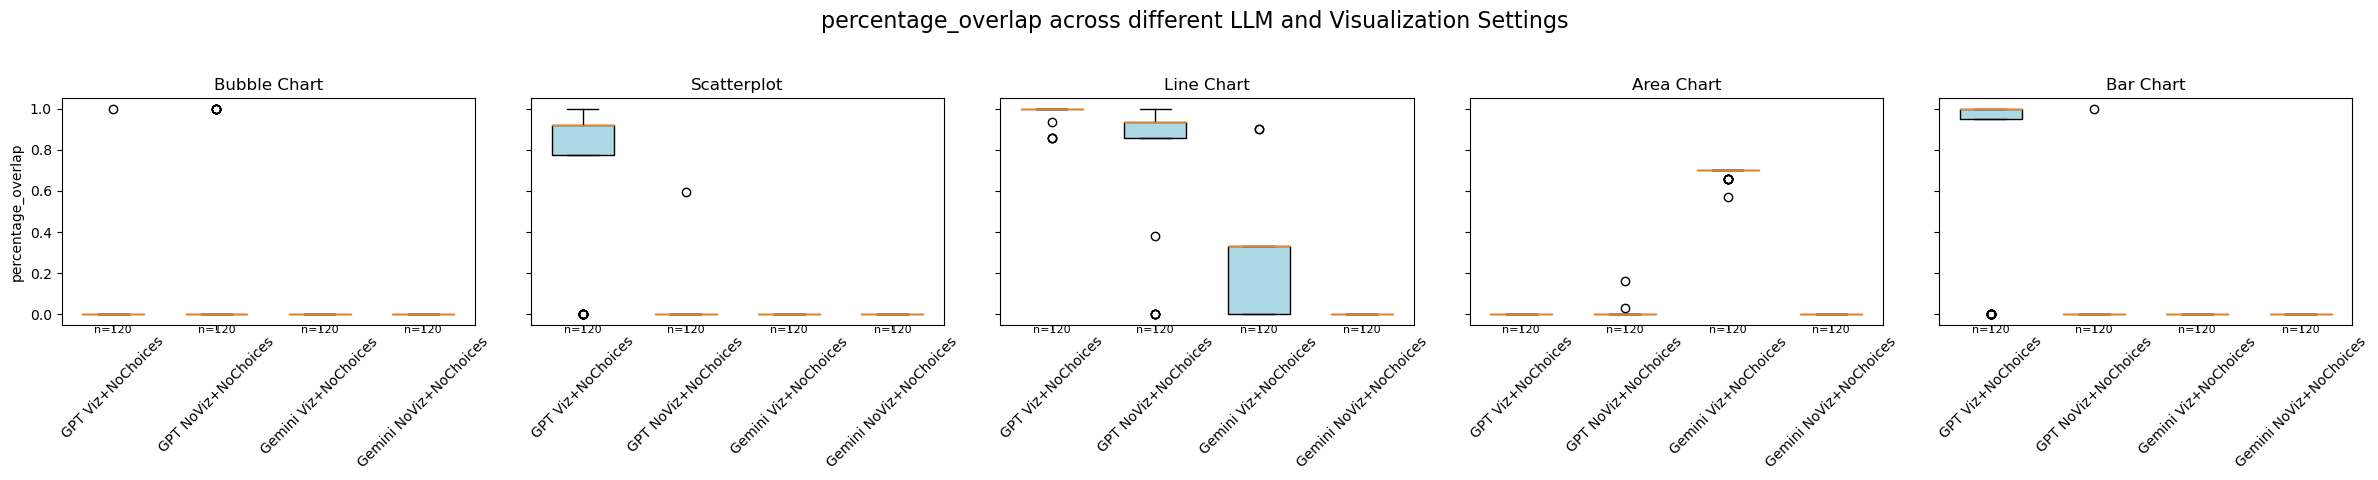

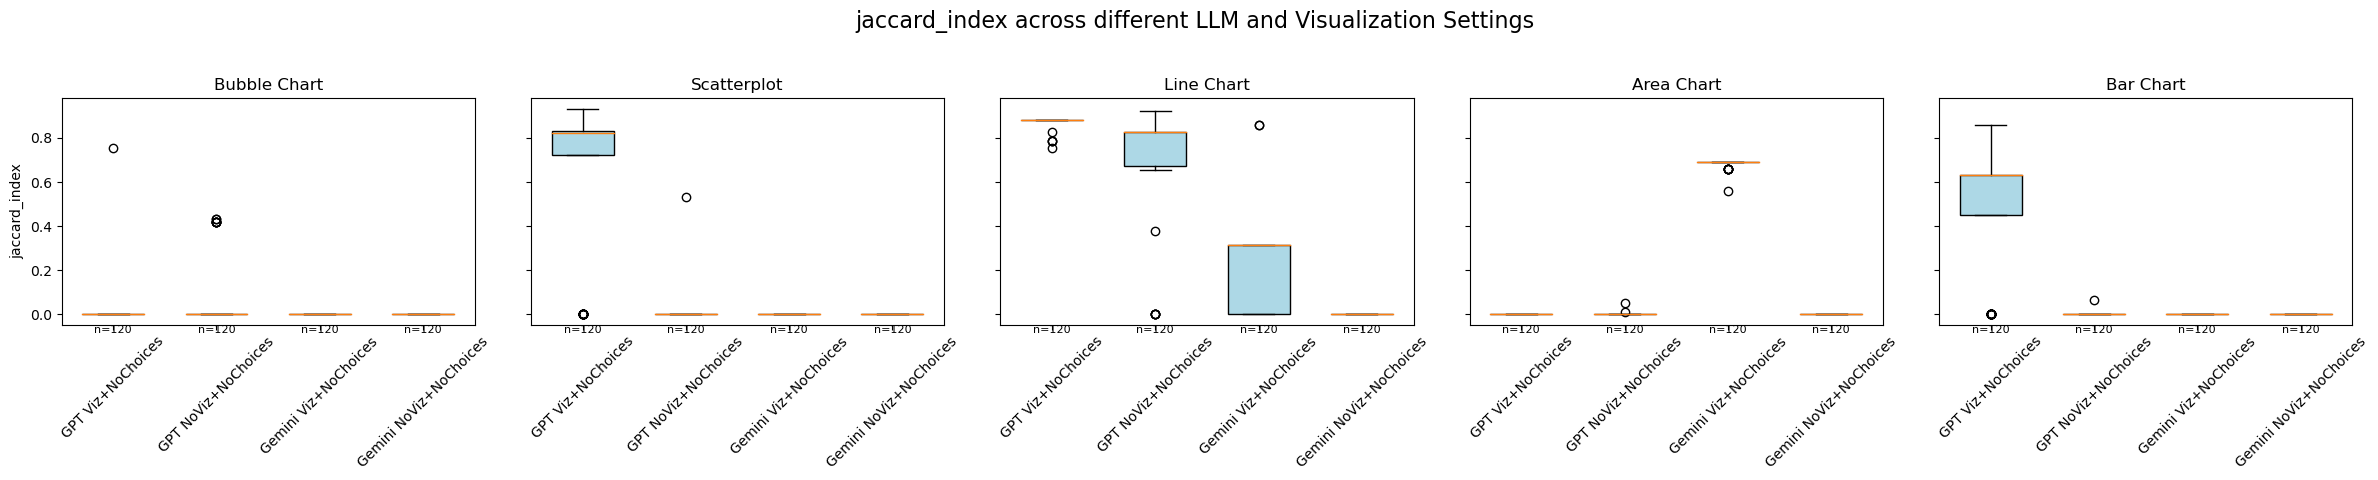

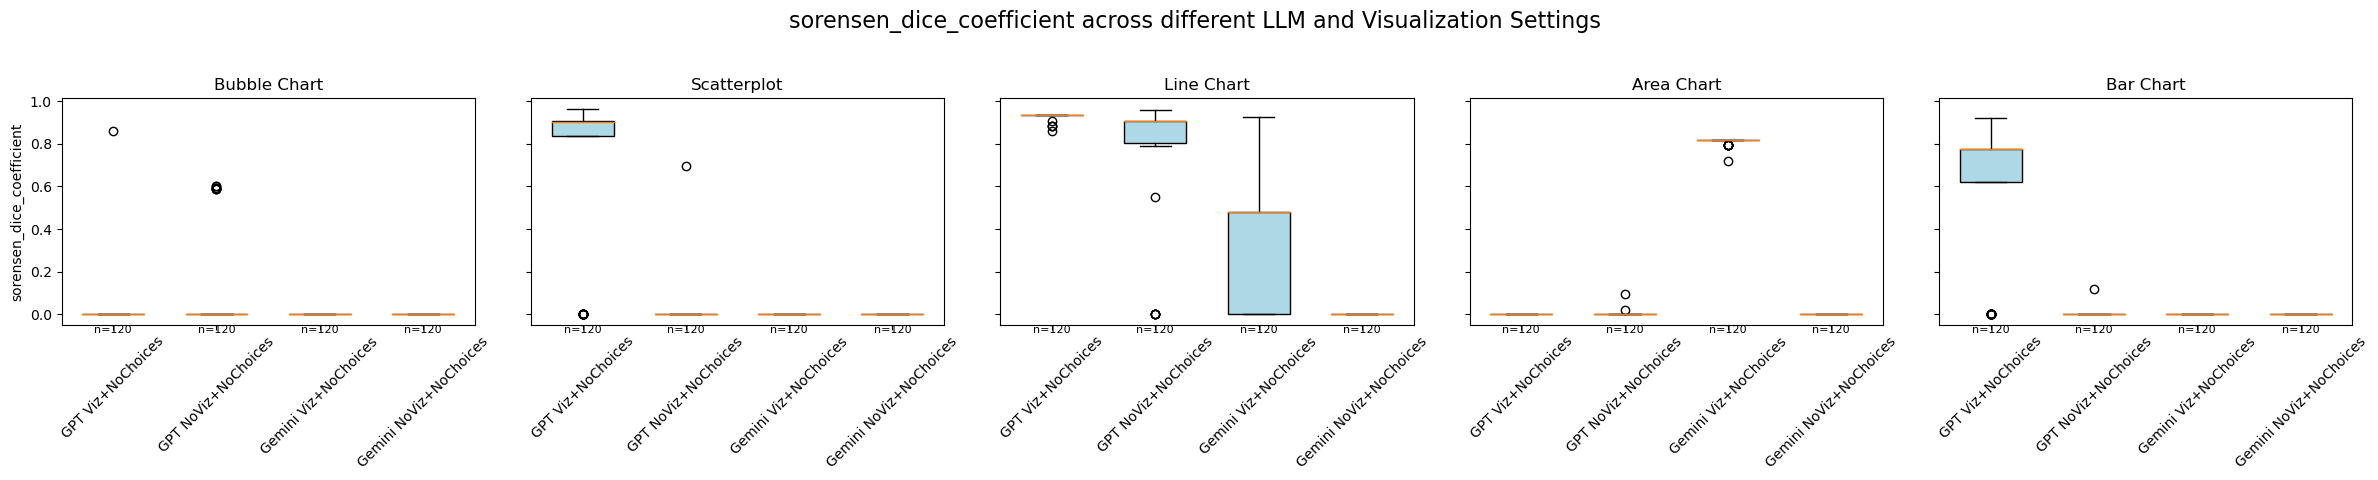

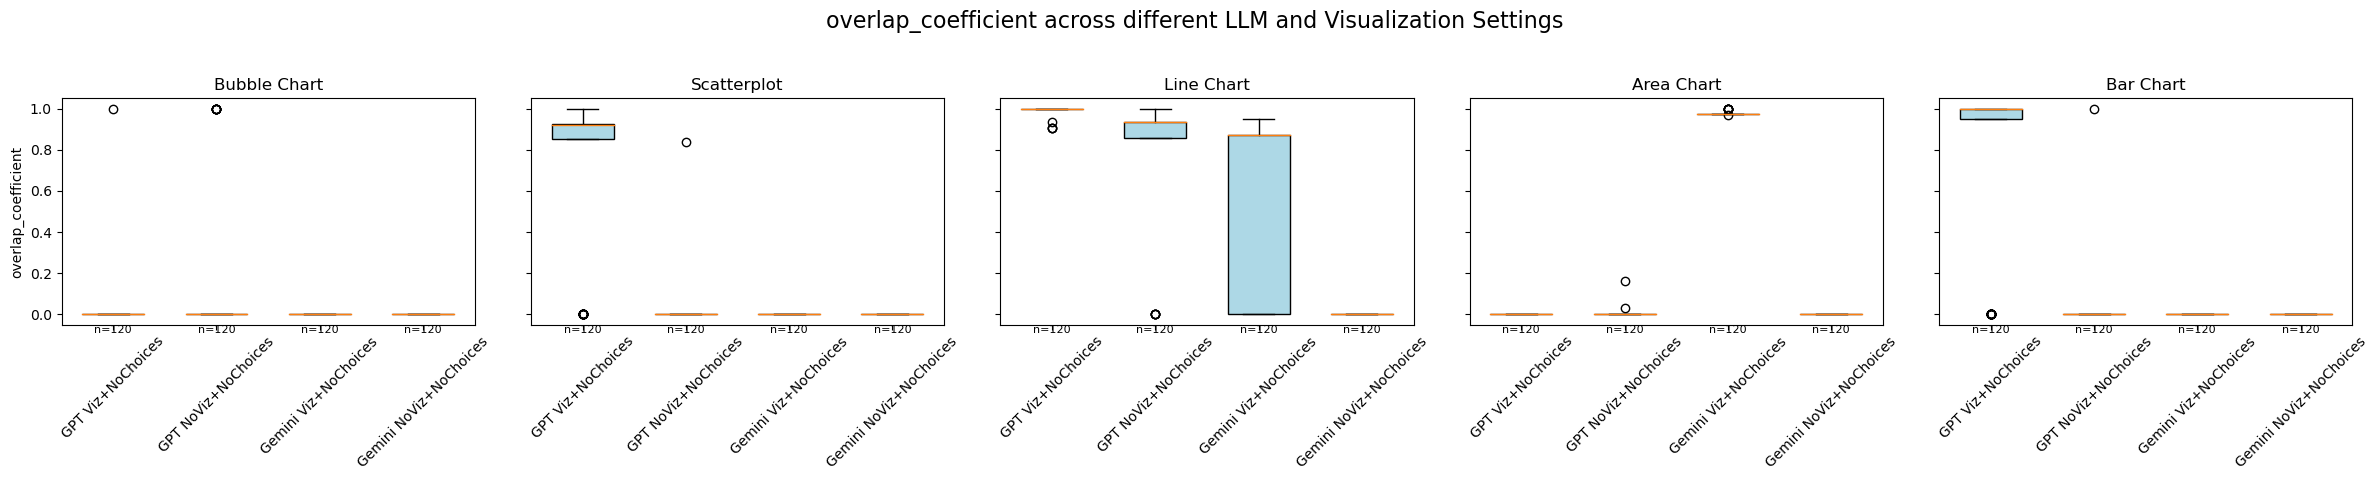

In [26]:

# Columns to check for NA values before plotting remain the same
columns_to_check = ['percentage_overlap', 'jaccard_index', 'sorensen_dice_coefficient', 'overlap_coefficient']

# Including df_gemini_no_viz_no_choices in the list of DataFrames
dfs = [df_gpt_viz_no_choices, df_gpt_no_viz_no_choices, df_gemini_viz_no_choices, df_gemini_no_viz_no_choices]
names = ["GPT Viz+NoChoices", "GPT NoViz+NoChoices", "Gemini Viz+NoChoices", "Gemini NoViz+NoChoices"]  # Updated names list with the additional category

chart_types_ordered = ["Bubble Chart", "Scatterplot", "Line Chart", "Area Chart", "Bar Chart"]

def plot_metric_across_llm_vis_with_samples(df_splits, columns_to_check, names, chart_types_ordered):
    for metric in columns_to_check:
        fig, axes = plt.subplots(1, len(chart_types_ordered), figsize=(24, 5), sharey=True)  # Adjusted figsize for additional category
        fig.suptitle(f"{metric} across different LLM and Visualization Settings", fontsize=16)

        for i, chart_type in enumerate(chart_types_ordered):
            data = []
            sample_sizes = []  # Store sample sizes for annotations
            for df in df_splits:
                if not df.empty and chart_type in df['chartType'].unique():
                    values = df[df['chartType'] == chart_type][metric].dropna()
                    data.append(values)
                    sample_sizes.append(len(values))  # Append the size of each dataset
                else:
                    data.append(pd.Series(dtype='float64'))  # Append empty data for missing chart types or empty DataFrames
                    sample_sizes.append(0)  # No data points for missing chart types or empty DataFrames

            # Boxplot for each chart type
            bplot = axes[i].boxplot(data, notch=False, patch_artist=True, positions=np.arange(len(names)) + 1, widths=0.6)
            for patch in bplot['boxes']:
                patch.set_facecolor('lightblue')

            # Annotate sample sizes directly above the x-axis
            for j, size in enumerate(sample_sizes):
                # Position the text at the lower part of the plot, just above the x-axis
                axes[i].text(j + 1, -0.05, f'n={size}', ha='center', va='top', fontsize=8, color='black', transform=axes[i].transData)

            axes[i].set_title(chart_type)
            axes[i].set_xticks(np.arange(len(names)) + 1)
            axes[i].set_xticklabels(names, rotation=45)
            if i == 0:
                axes[i].set_ylabel(metric)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

plot_metric_across_llm_vis_with_samples(dfs, columns_to_check, names, chart_types_ordered)
